In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
df=pd.read_csv("Spamdata.csv",encoding="latin-1")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [23]:
df=df[['label','text']]
df.columns=['Label','Message']
df['Label']=df['Label'].map({'ham':0,'spam':1})
df.head()

,Label,Message
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [25]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000) 
x=vectorizer.fit_transform(df['Message'])
y=df['Label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
svm_model=SVC(kernel='linear')
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

Accuracy: 99.03%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.98      0.98      0.98       293

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035



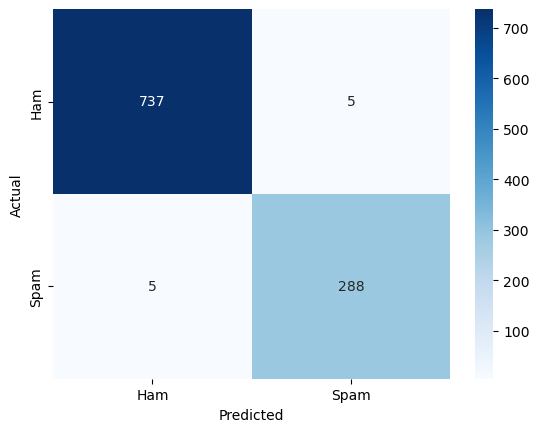

In [53]:
y_pred=svm_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))
conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=['Ham', 'Spam'],yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [65]:
def predict_email(email):
    email_transform=vectorizer.transform([email])
    predict=svm_model.predict(email_transform)
    return "Spam"if predict[0]==1 else "Not Spam"


In [80]:
mail=input()
predict_email(mail)

 hai what are you doing


'Not Spam'

In [84]:
import joblib

# Save the trained model
joblib.dump(svm_model, 'svm_model.pkl')

# Save the vectorizer (if you used CountVectorizer or TfidfVectorizer)
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']